In [1]:
import random

import rich

import networkx

In [2]:
from twon_lss.simulations.bcm import (
    Simulation,
    SimulationArgs,
    Ranker,
    Agent,
)

from twon_lss.schemas import Post, User, Feed, Network

In [3]:
NUM_AGENTS: int = 100
NUM_NEIGHBORS: int = 5

ARGS = SimulationArgs(num_steps=50, num_posts_to_interact_with=2)

In [4]:
RANKER = Ranker()
rich.print(RANKER)

Ranker(
    args=RankerArgs(weights=RankerInterfaceWeights(network=1.0, individual=1.0), noise=Noise(low=0.8, high=1.2)),
    type='random'
)

In [5]:
USERS = [User() for _ in range(NUM_AGENTS)]
rich.print(USERS[:5])

[
    User(id='user-c46e7212-df4e-42a6-a5a1-243bb2e56a53'),
    User(id='user-f7474839-a42c-4fe5-8ffc-1c173d35792e'),
    User(id='user-27cb7113-78b8-4154-abbb-3f2abb7ae088'),
    User(id='user-676c8a97-86b2-4a5e-a429-10f02c8263f5'),
    User(id='user-79939eb9-bd3f-40a6-b0de-f2af8add539c')
]

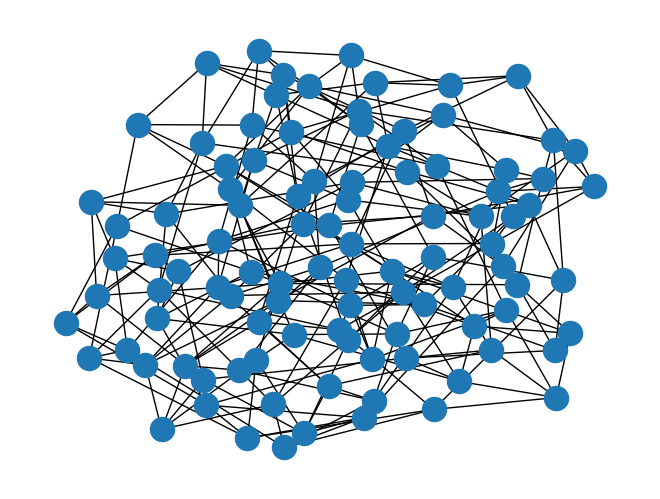

In [6]:
NETWORK = Network.from_graph(networkx.random_regular_graph(NUM_NEIGHBORS, len(USERS)), USERS)
networkx.draw(NETWORK.root)

In [7]:
FEED = Feed(
    [
        Post(user=user, content=str(random.uniform(-1.0, 1.0)))
        for user in USERS
    ]
)
rich.print(FEED[:3])

[
    Post(
        user=User(id='user-c46e7212-df4e-42a6-a5a1-243bb2e56a53'),
        content='0.202682104491396',
        interactions=[],
        comments=[],
        id='post-298f1e4e-896d-4a26-9c3d-241dabbd6e91',
        timestamp=datetime.datetime(2025, 8, 12, 15, 23, 33, 539568)
    ),
    Post(
        user=User(id='user-f7474839-a42c-4fe5-8ffc-1c173d35792e'),
        content='0.18998447233764182',
        interactions=[],
        comments=[],
        id='post-480f1052-23ff-42a6-a92a-291b88a1612d',
        timestamp=datetime.datetime(2025, 8, 12, 15, 23, 33, 539663)
    ),
    Post(
        user=User(id='user-27cb7113-78b8-4154-abbb-3f2abb7ae088'),
        content='0.33778028398186755',
        interactions=[],
        comments=[],
        id='post-b8d7ec71-5e0d-43cd-8170-277886706412',
        timestamp=datetime.datetime(2025, 8, 12, 15, 23, 33, 539756)
    )
]

In [8]:
INDIVIDUALS = {
    user: Agent(
        memory=[float(post.content)],
    )
    for user, post in zip(
        USERS, FEED.root, strict=False
    )
}
rich.print(INDIVIDUALS.get(USERS[0]))

Agent(eps=0.4, delta=0.1, memory=[0.202682104491396], memory_length=4)

In [9]:
simulation = Simulation(
    args=ARGS,
    ranker=RANKER,
    individuals=INDIVIDUALS,
    network=NETWORK,
    feed=FEED,
)

In [10]:
simulation()

Output()